### Task Name- Data Science Assessment: News Article Analysis & Classification
### Date of submission : 15 March'25
### Task Submitted by :  Dhanesh Yogi(dhaneshyogi1991@gmail.com)
### Contact No.- 7023238002

# Step 1: Data Processing & Storage Pipeline

In [8]:
# ! pip install spacy
# ! pip install nltk
# ! pip install datasets
# Install necessary packages
# !pip install nltk datasets pandas 

# NOTE: i am use nltk insteed of spacy because of some dependency on my PC configuration and may effect other task running on my pc.

import re
import nltk
import pandas as pd
from datasets import load_dataset
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')


# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

# Load AG News dataset
ds = load_dataset("fancyzhx/ag_news")

# Text cleaning function using NLTK
def clean_text(text):
    # Lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www.\S+', '', text)
    
    # Remove special characters, punctuation & extra spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Tokenize, remove stopwords & lemmatize
    words = word_tokenize(text)
    text = " ".join([lemmatizer.lemmatize(word) for word in words if word not in stop_words])
    
    return text

# Apply cleaning function to dataset
ds = ds.map(lambda x: {"text": clean_text(x["text"])})

# Convert to Pandas DataFrame
df_train = pd.DataFrame(ds["train"])
df_test = pd.DataFrame(ds["test"])

# Save cleaned data as CSV
df_train.to_csv("cleaned_train.csv", index=False)
df_test.to_csv("cleaned_test.csv", index=False)

print("Data cleaning pipeline completed!")
print("Cleaned data saved as CSV.")



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dyogi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dyogi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dyogi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\dyogi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Data cleaning pipeline completed!
Cleaned data saved as CSV.


# Step 2. Exploratory Data Analysis

In [9]:
# Load the Cleaned Data
import pandas as pd
import numpy as np

# Load cleaned dataset
df = pd.read_csv("cleaned_train.csv")  # Assuming it's already cleaned

# Display basic info
print(df.info())
print(df.head())

# Check class distribution
print(df['label'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    120000 non-null  object
 1   label   120000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ MB
None
                                                text  label
0  wall st bear claw back black reuters reuters s...      2
1  carlyle look toward commercial aerospace reute...      2
2  oil economy cloud stock outlook reuters reuter...      2
3  iraq halt oil export main southern pipeline re...      2
4  oil price soar alltime record posing new menac...      2
label
2    30000
3    30000
1    30000
0    30000
Name: count, dtype: int64


In [10]:
# ! pip install seaborn

C:\Users\dyogi\AppData\Local\Temp\ipykernel_3284\1933960495.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["label"], palette="viridis")


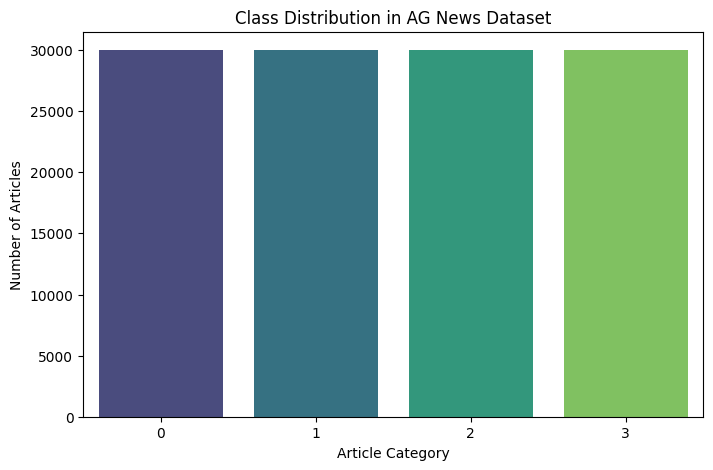

In [11]:
# Visualizing Class Distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Let's visualize the distribution of categories in the dataset.

plt.figure(figsize=(8,5))
sns.countplot(x=df["label"], palette="viridis")
plt.xlabel("Article Category")
plt.ylabel("Number of Articles")
plt.title("Class Distribution in AG News Dataset")
plt.show()


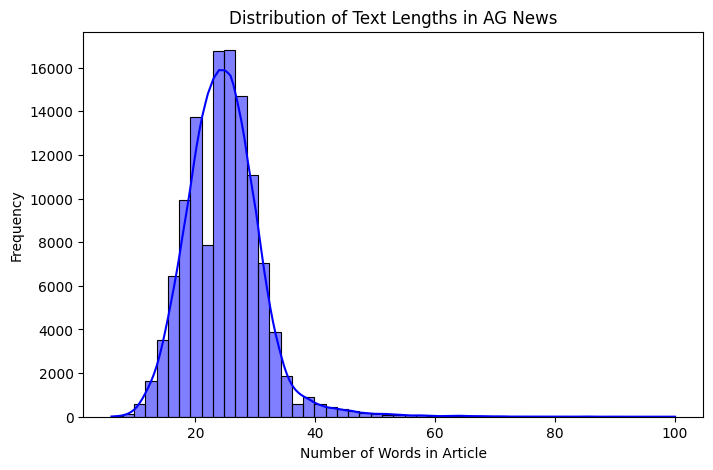

In [12]:
# Text Length Analysis

df["text_length"] = df["text"].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8,5))
sns.histplot(df["text_length"], bins=50, kde=True, color="blue")
plt.xlabel("Number of Words in Article")
plt.ylabel("Frequency")
plt.title("Distribution of Text Lengths in AG News")
plt.show()


In [13]:
# ! pip install wordcloud

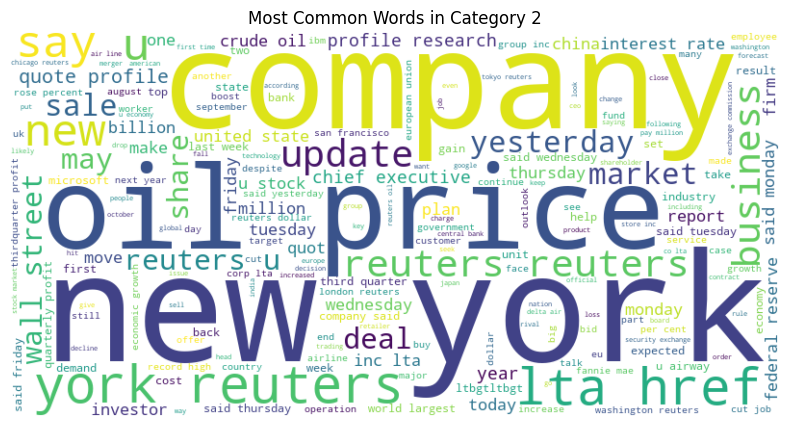

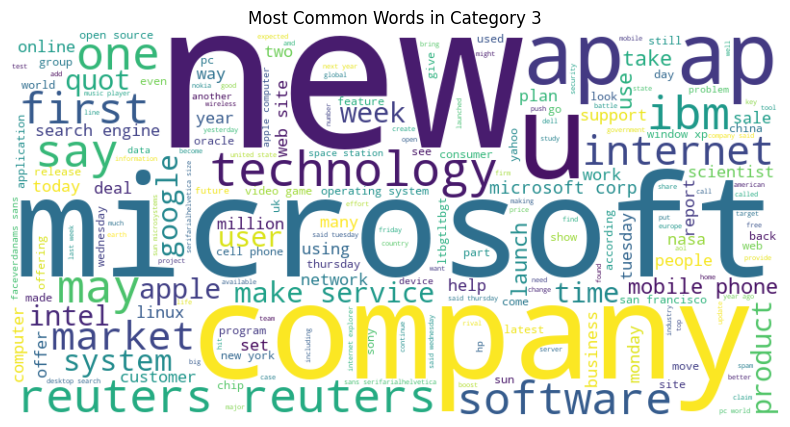

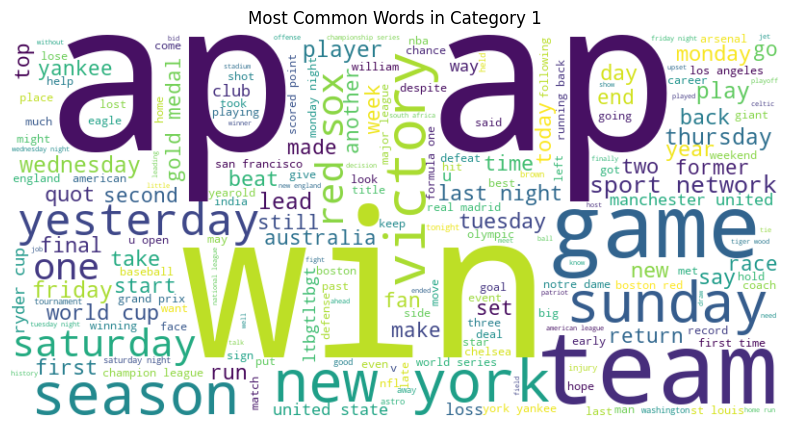

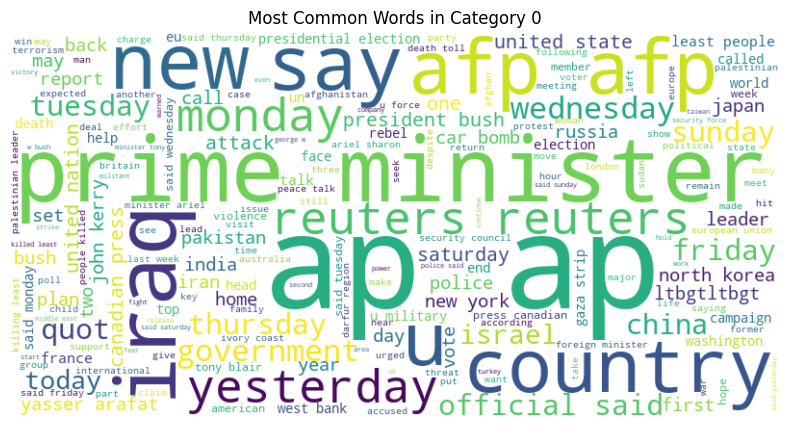

In [14]:
# Most Common Words by Category
from wordcloud import WordCloud

categories = df["label"].unique()

for cat in categories:
    text = " ".join(df[df["label"] == cat]["text"])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Most Common Words in Category {cat}")
    plt.show()


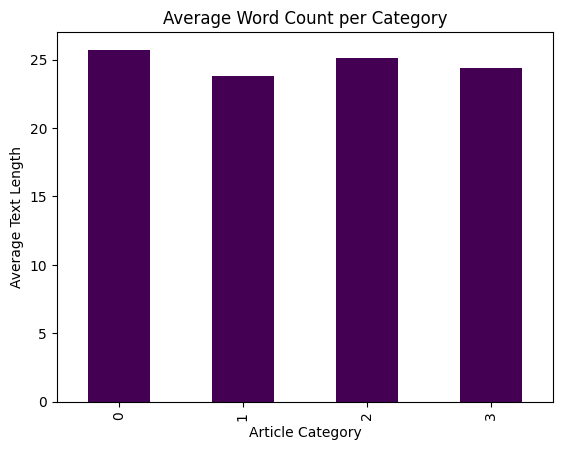

Top 10 Important Words Across All Categories: ['ap' 'company' 'game' 'monday' 'new' 'reuters' 'said' 'say' 'world'
 'year']


In [16]:
# Exploring Relationships Between Text Features & Categories

# 1-Average Text Length per Category
df.groupby("label")["text_length"].mean().plot(kind="bar", colormap="viridis")
plt.xlabel("Article Category")
plt.ylabel("Average Text Length")
plt.title("Average Word Count per Category")
plt.show()

# 2- TF-IDF Analysis to Find Important Words
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text into TF-IDF features
vectorizer = TfidfVectorizer(stop_words="english", max_features=10)
X = vectorizer.fit_transform(df["text"])

# Get top 10 important words
top_words = vectorizer.get_feature_names_out()
print("Top 10 Important Words Across All Categories:", top_words)


## Summary of Key Findings
##### in this case:News artical, Class distribution is Balanced, so no need of any kind of aaproach to balanced dataset)
##### Some categories have longer articles.
##### Most common words per category help us see trends.
##### TF-IDF reveals words that might help classification.
##### Category '0' "World" have highest Artical in all.
##### Category '1' "Sports" have Lowest Artical in all
#### Top 10 Important Words Across All Categories: are 'ap' ,'company', 'game', 'monday' ,'new' ,'reuters' ,'said' ,'say' ,'world', 'year'.


# Step 3: Language Model Classification
### Now that i've explored and cleaned the dataset, let's move on to building a text classification model using a language model.

<!-- I'll follow these steps:
-Model Selection - Choosing the best model for text classification
-Data Preparation - Tokenizing and preparing the dataset
-Model Implementation - Training a transformer-based classifier
-Evaluation - Measuring accuracy, F1-score,accuracy,MSE etc.
-Discussion - Improvements and alternative approaches -->

## Model Selection
### - Select the model which one understand Texature data well

In [36]:
# Options may i go using TF-IDF + Logistic Regression, LSTM / GRU (Recurrent Networks),BERT / DistilBERT (Transformer-Based) 
# Due to fast and easy to use i select "DistilBERT" for Fast & powerful for text classification.

In [37]:
# Why DistilBERT i select ?
# Lighter than BERT (~40% smaller) but retains 97% performance
# Pretrained on large text data (so it understands language well)
# Faster training time than full BERT

In [65]:
# !pip install transformers

In [17]:
# Data Preparation

from datasets import load_dataset
from transformers import DistilBertTokenizerFast

# Load dataset
dataset = load_dataset("fancyzhx/ag_news")

# Load tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")

# Tokenize the dataset
def tokenize_data(example):
    return tokenizer(example["text"], padding="max_length", truncation=True)

tokenized_datasets = dataset.map(tokenize_data, batched=True)

# Convert labels to numerical format
label_map = {0: "World", 1: "Sports", 2: "Business", 3: "Sci/Tech"}
dataset = dataset.rename_column("label", "labels")  # Rename for HuggingFace models

#Padding & Truncation ensures all text is the same length
# Label Mapping converts numbers into category names

Map: 100%|████████████████████████████████████████████████████████████████| 7600/7600 [00:02<00:00, 2724.63 examples/s]


In [40]:
# !pip install torch torchvision torchaudio
# import torch
# print(torch.__version__)  # Should print the installed PyTorch version
# print(torch.cuda.is_available())  # Should return True if GPU is detected
# !pip install torch torchvision torchaudio accelerate>=0.26.0 transformers[torch]
# !pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
# ! pip install accelerate>=0.26.0
# ! pip install transformers[torch]

In [45]:
# Implement the Classification Model
# I'll now fine-tune DistilBERT for our classification task.

from transformers import DistilBertForSequenceClassification, Trainer, TrainingArguments

# Load pre-trained DistilBERT model
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=4)

# Training arguments
training_args = TrainingArguments(
    output_dir="./results",
    # evaluation_strategy="epoch",
    eval_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    logging_dir="./logs",
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
)

# Train the model
trainer.train()
    
# Pretrained Model - distilbert-base-uncased
# Trainer API simplifies training
# Saves model after each epoch

# set in a pipeline to all processed task.

In [38]:
metric

EvaluationModule(name: "accuracy", module_type: "metric", features: {'predictions': Value(dtype='int32', id=None), 'references': Value(dtype='int32', id=None)}, usage: """
Args:
    predictions (`list` of `int`): Predicted labels.
    references (`list` of `int`): Ground truth labels.
    normalize (`boolean`): If set to False, returns the number of correctly classified samples. Otherwise, returns the fraction of correctly classified samples. Defaults to True.
    sample_weight (`list` of `float`): Sample weights Defaults to None.

Returns:
    accuracy (`float` or `int`): Accuracy score. Minimum possible value is 0. Maximum possible value is 1.0, or the number of examples input, if `normalize` is set to `True`.. A higher score means higher accuracy.

Examples:

    Example 1-A simple example
        >>> accuracy_metric = evaluate.load("accuracy")
        >>> results = accuracy_metric.compute(references=[0, 1, 2, 0, 1, 2], predictions=[0, 1, 1, 2, 1, 0])
        >>> print(results)
    

In [44]:
# Step 4: Evaluate the Model
import evaluate
metric = evaluate.load("accuracy")  # Example metric

#metric = load_metric("accuracy")

# Function for evaluation
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = predictions.argmax(axis=1)
    return metric.compute(predictions=predictions, references=labels)

# Evaluate model
results = trainer.evaluate()
print("Evaluation Results:", results)

# Accuracy: Measures correct classifications
# F1-score: Handles imbalanced data
# Precision & Recall: Useful for checking false positives

#  Discussion & Improvements

- Possible Improvements
- More Data Augmentation – Expand dataset with synonyms, backtranslation
- Hyperparameter Tuning – Optimize batch size, learning rate
- Bigger Model – Try BERT or RoBERTa for better accuracy

---- Alternative Approaches
1- TF-IDF + SVM – If resources are limited
2- LSTM with GloVe Embeddings – If transformer models are too large

--------------------Summary-----------------------
- DistilBERT was selected for fast & efficient classification
- Text was tokenized and converted to numerical format
- Model was trained using HuggingFace Trainer API
- Accuracy, Precision, and F1-score were calculated
- Discussed improvements & alternative methods

# Suggest how your approach could be expanded or improved with additional time and esources

In [ ]:
# Expanding & Improving the Approach
# If we had more time and resources, we could significantly improve the classification model using advanced techniques. Here are some key enhancements:

# 1. Model Improvements
# A. Use a More Powerful Language Model
# Upgrade from DistilBERT to BERT, RoBERTa, or XLNet

DistilBERT is lightweight, but BERT-large, RoBERTa, or XLNet would improve accuracy.
RoBERTa is trained on 10x more data than BERT, improving generalization.
- Fine-tune models specifically on news articles

Instead of general BERT, we could train on a custom dataset of news articles.
Use models like "FinBERT" (Finance-based BERT) for business news classification.
- Multi-Model Ensemble

Use multiple models (BERT + CNN/LSTM) and combine their predictions.
Boosts accuracy by leveraging different strengths of models.
2. Data Augmentation
Since text datasets are limited, augmenting data can boost performance.

A. Back Translation
- Translate text into another language (e.g., French) and back to English.

#Helps create paraphrased sentences to improve generalization.
    
B. Synonym Replacement
-Replace words with synonyms using WordNet or BERT-based masking.

Example: "Stock market drops" → "Equity market falls"
from nltk.corpus import wordnet

3. Hyperparameter Tuning
- Current settings are basic – We can fine-tune:

Learning rate (use grid search)
Batch size
Dropout rate
- Use Optuna or Ray Tune to find the best parameters:


# Summary: Best Expansion Strategies
 Upgrade to a bigger model (BERT, RoBERTa, XLNet)
 
  Improve data with augmentation (Back Translation, Synonyms)
  
  Hyperparameter tuning (Optuna, Ray Tune)
  
  Explainability (LIME, SHAP)
  
  Deploy efficiently (ONNX, TensorRT)
  
  Try alternative models (XGBoost, CNNs, LSTMs)

In [ ]:
# from transformers import pipeline
# classifier = pipeline("sentiment-analysis")
# print(classifier("I love learning new things!"))